## Analysis Using the 50/50 Balanced dataset (70,692 entries)

## 1.1 Feature inspection and preparation

 Import our data into a dataframe. Inspect a sample of the data

In [1]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

path = "."

filename_read = os.path.join(path, "diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
diabetes = pd.read_csv(filename_read)
diabetes.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


In [2]:
# Check to see if we have any missing (null) values in the dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [3]:
# Check our variables for things like range of values, mean, std deviation etc
diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


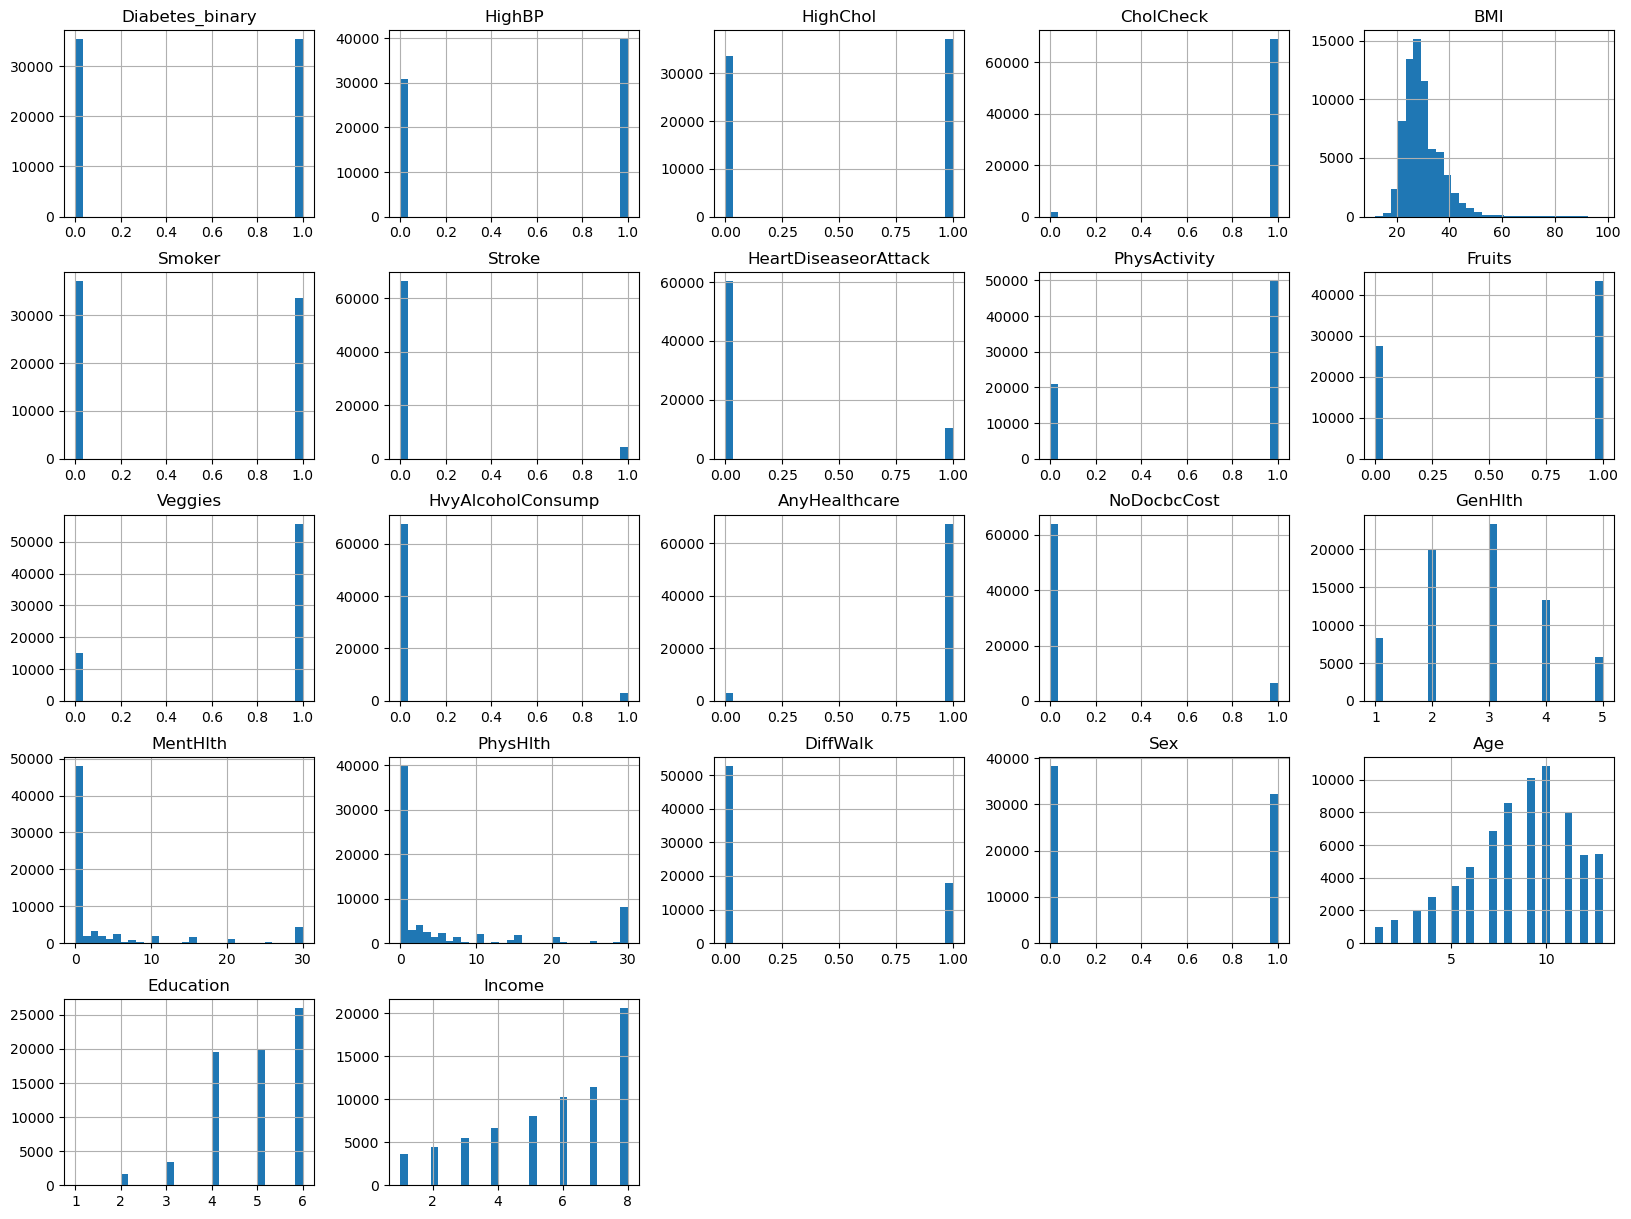

In [4]:
# Plot a histogram of each attribute
diabetes.hist(bins=30, figsize=(20,15))
plt.show()

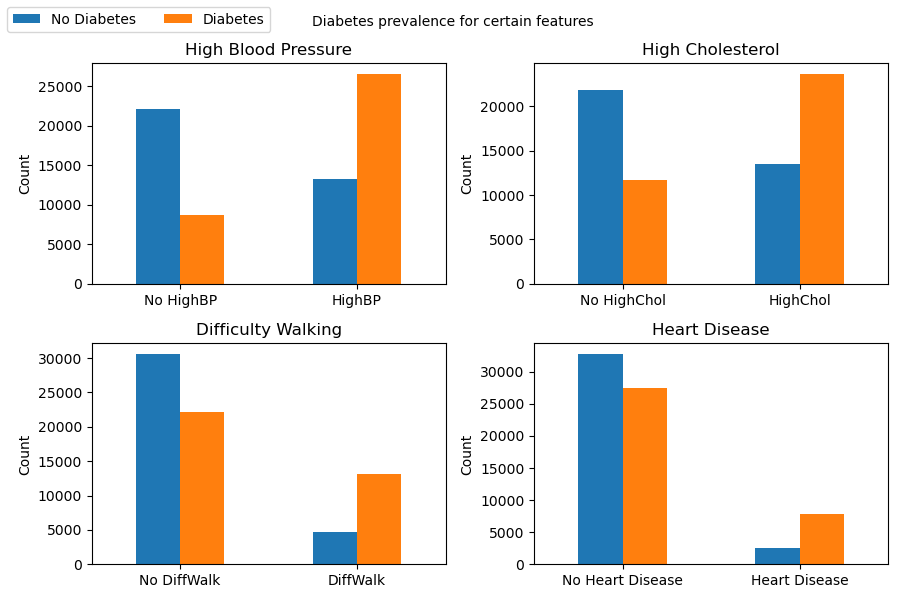

In [5]:
# Plot the correlation of certain features to the target variable

# Calculate the counts
count_df = diabetes.groupby(['HighBP', 'Diabetes_binary']).size().unstack()
count_df1 = diabetes.groupby(['HighChol', 'Diabetes_binary']).size().unstack()
count_df2 = diabetes.groupby(['DiffWalk', 'Diabetes_binary']).size().unstack()
count_df3 = diabetes.groupby(['HeartDiseaseorAttack', 'Diabetes_binary']).size().unstack()

# Set up the figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
fig.suptitle('Diabetes prevalence for certain features', fontsize=10)

# Plot for HighBP
count_df.plot(kind='bar', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('High Blood Pressure')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(['No HighBP', 'HighBP'], rotation=0)

# Plot for HighChol
count_df1.plot(kind='bar', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('High Cholesterol')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(['No HighChol', 'HighChol'], rotation=0)

# Plot for DiffWalk
count_df2.plot(kind='bar', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Difficulty Walking')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticklabels(['No DiffWalk', 'DiffWalk'], rotation=0)

# Plot for HeartDiseaseorAttack
count_df3.plot(kind='bar', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Heart Disease')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticklabels(['No Heart Disease', 'Heart Disease'], rotation=0)

# Set the layout and the plot legend
plt.tight_layout()
plt.subplots_adjust(top=0.9) 
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, ['No Diabetes', 'Diabetes'], loc='upper left', ncol=2)

plt.show()




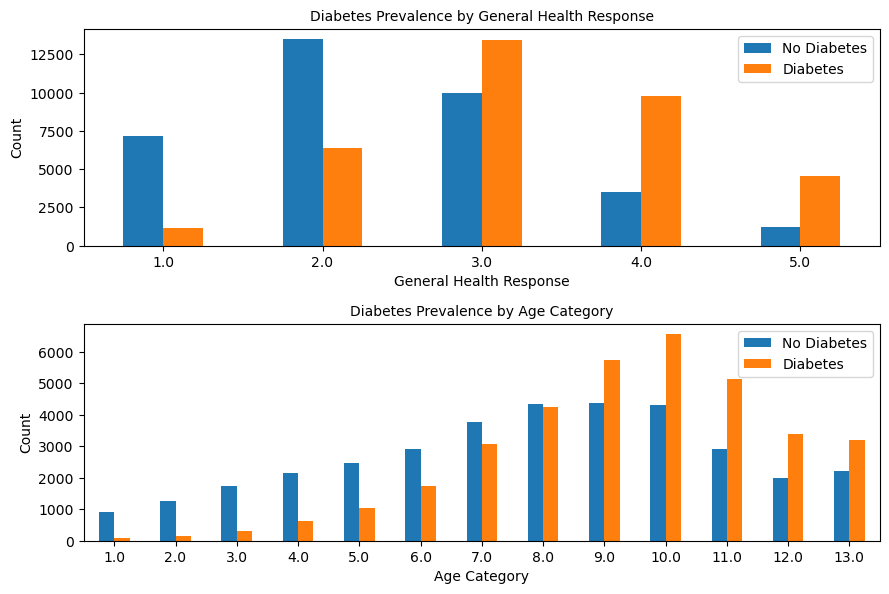

In [6]:
# Plot the correlation between General Health, Age and Diabetes prevalence

fig, axes = plt.subplots(nrows=2, ncols=1,)

count_df4 = diabetes.groupby(['GenHlth', 'Diabetes_binary']).size().unstack()
count_df4.plot(kind='bar', stacked=False, ax=axes[0], figsize=(9, 6))
axes[0].set_xlabel('General Health Response')
axes[0].set_ylabel('Count')
axes[0].set_title('Diabetes Prevalence by General Health Response', fontsize=10)
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(labels=['No Diabetes', 'Diabetes'])

count_df5 = diabetes.groupby(['Age', 'Diabetes_binary']).size().unstack()
count_df5.plot(kind='bar', stacked=False, ax=axes[1], figsize=(9, 6))
axes[1].set_xlabel('Age Category')
axes[1].set_ylabel('Count')
axes[1].set_title('Diabetes Prevalence by Age Category', fontsize=10)
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(labels=['No Diabetes', 'Diabetes'])

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top padding

plt.show()


In [ ]:
# !!! Optional Step - Assign BMI values to discrete numerical bins
# According to the NHS and CDC BMI ranges are defined as:
#  BMI < 18.5 - Underweight
#  18.5 <= BMI < 24.9   - Healthy range
#  25 <= BMI < 29.9  - Overweight
#  30 <= BMI < 39.9  - Obesity
#  40 <= BMI - Severe obesity

def assign_bmi_class(bmi):
    if bmi < 18.5:
        return 0  # Underweight
    elif 18.5 <= bmi < 24.9:
        return 0.25  # Healthy range
    elif 25 <= bmi < 29.9:
        return 0.5  # Overweight
    elif 30 <= bmi < 39.9:
        return 0.75  # Obesity
    else:
        return 1  # Severe obesity

# Apply function to each BMI value
diabetes['BMI_class'] = diabetes['BMI'].apply(assign_bmi_class)


In [ ]:

# !!! Optional - Bar chart for BMI_class vs Diabetes_binary
count_df6 = diabetes.groupby(['BMI_class', 'Diabetes_binary']).size().unstack()
count_df6.plot(kind='bar', stacked=False, figsize=(9, 6))
plt.xlabel('BMI Classification')
plt.ylabel('Count')
plt.title('Diabetes Prevalence by BMI Category')
plt.xticks(rotation=0) 
plt.legend(labels=['No Diabetes', 'Diabetes'])
plt.show()

In [7]:
# Here we normalize all attributes that are outside the 0-1 range

# Use min-max scaling to bring the values between 0 and 1
diabetes['BMI'] = (diabetes['BMI'] - diabetes['BMI'].min()) / (diabetes['BMI'].max() - diabetes['BMI'].min())
diabetes['MentHlth'] = (diabetes['MentHlth'] - diabetes['MentHlth'].min()) / (diabetes['MentHlth'].max() - diabetes['MentHlth'].min())
diabetes['PhysHlth'] = (diabetes['PhysHlth'] - diabetes['PhysHlth'].min()) / (diabetes['PhysHlth'].max() - diabetes['PhysHlth'].min())
diabetes['Age'] = (diabetes['Age'] - diabetes['Age'].min()) / (diabetes['Age'].max() - diabetes['Age'].min())
diabetes['GenHlth'] = (diabetes['GenHlth'] - diabetes['GenHlth'].min()) / (diabetes['GenHlth'].max() - diabetes['GenHlth'].min())
diabetes['Education'] = (diabetes['Education'] - diabetes['Education'].min()) / (diabetes['Education'].max() - diabetes['Education'].min())
diabetes['Income'] = (diabetes['Income'] - diabetes['Income'].min()) / (diabetes['Income'].max() - diabetes['Income'].min())

In [ ]:
# !!! Optional - Drop the 'BMI' attribute from df
diabetes = diabetes.drop('BMI', axis = 1)

In [ ]:
#!!! Optional -  Plot a histogram of the attributes after all the data manipulations I have applied
diabetes.hist(bins=30, figsize=(20,15))
plt.show()

In [8]:
# Separate the features from the target variable
X = diabetes.drop('Diabetes_binary', axis=1)
y = diabetes['Diabetes_binary']


In [9]:
# Use sklearn's SelectKBest to obtain the scores and p-values of features in my dataset 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

select_k_best = SelectKBest(score_func=chi2, k='all')

# Fit SelectKBest to the data
fit = select_k_best.fit(X, y)

# Get the scores and p-values
scores = fit.scores_
pvalues = fit.pvalues_

# Create a DataFrame with the feature names and their scores and p-values
feature_scores = pd.DataFrame({'Feature Name': X.columns, 'Score': scores, 'p-Value': pvalues})

# Sort the DataFrame by score in descending order
sorted_features = feature_scores.sort_values(by='Score', ascending=False)

print(sorted_features)

# !!! Optional Drop unwanted features at this step
#X.drop(['AnyHealthcare', 'CholCheck', 'Sex', 'Fruits', 'Veggies', 'NoDocbcCost', 'Education', 'BMI', 'Smoker', 'MentHlth', 'Age'], axis=1, inplace=True)

#print(X.describe())

            Feature Name        Score        p-Value
0                 HighBP  4491.799960   0.000000e+00
16              DiffWalk  3926.865331   0.000000e+00
1               HighChol  2804.501278   0.000000e+00
6   HeartDiseaseorAttack  2695.401378   0.000000e+00
13               GenHlth  1981.980736   0.000000e+00
15              PhysHlth  1864.301775   0.000000e+00
5                 Stroke  1042.976337  8.183772e-229
10     HvyAlcoholConsump   608.852980  1.987141e-134
7           PhysActivity   528.494034  6.005937e-117
20                Income   512.336568  1.967192e-113
18                   Age   490.930094  8.941998e-109
14              MentHlth   316.385175   8.877734e-71
4                 Smoker   274.340616   1.285045e-61
3                    BMI   200.502204   1.622709e-45
19             Education   110.981748   5.971800e-26
12           NoDocbcCost   107.550083   3.372739e-25
9                Veggies    93.883501   3.346521e-22
8                 Fruits    80.250850   3.2977

In [10]:
# Split our data into a training and a test set at an 80/20 ratio 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

X_train.describe()

Training set shape: (56553, 21) (56553,)
Test set shape: (14139, 21) (14139,)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,...,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000,56553.000000
mean,0.563171,0.524747,0.974891,0.207930,0.475377,0.061836,0.146871,0.704578,0.613867,0.789383,...,0.954379,0.093063,0.458517,0.124713,0.192621,0.251092,0.458437,0.631397,0.784510,0.671322
std,0.495998,0.499392,0.156458,0.082587,0.499398,0.240859,0.353980,0.456236,0.486866,0.407750,...,0.208663,0.290523,0.277956,0.271554,0.334717,0.433645,0.498274,0.237749,0.206097,0.310707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.151163,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.500000,0.600000,0.428571
50%,1.000000,1.000000,1.000000,0.197674,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.666667,0.800000,0.714286
75%,1.000000,1.000000,1.000000,0.244186,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.750000,0.066667,0.166667,1.000000,1.000000,0.833333,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2.1 Analysis using Decision Trees model

In [11]:
# We will create a decision tree model and train it on our data using the fit() method

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Instantiate Model - Unrestricted Tree:
#decision_tree = DecisionTreeClassifier(random_state=42)

# Instantiate Model - Apply some regularisation
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=25, min_samples_split=100, min_samples_leaf=50, random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=50,
                       min_samples_split=100, random_state=42)

The accuracy is: 73.72%
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      7090
         1.0       0.72      0.78      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

[[4939 2151]
 [1565 5484]]


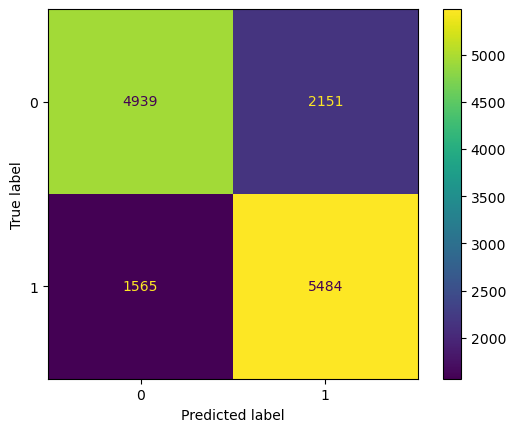

In [12]:
# Make predictions using the test data. 

y_pred = decision_tree.predict(X_test)

# Calculate accuracy metric
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy is: %.2f%%' % (accuracy * 100))

# Get the other metrics
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)

print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


## 2.2 Analysis using Random Forests

In [ ]:
# !!! Optional
# Code to produce graph of Accuracy as a function of Number of Estimators
# !!! This code taken from INM701 Tutorial 5 Part 2
# !!!

# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#builds a rf classifier over 128 estimators
#rf_model = RandomForestClassifier(n_estimators=128,criterion="entropy")
#rf_model.fit(X_train, y_train)
#y_model = rf_model.predict(X_test)

#accuracy = accuracy_score(y_test, y_model)

style.use('fivethirtyeight')

fig = plt.figure(figsize=(15,10))

#investigates the accuracy over a range of estimators plotting the result
#THIS TAKES A WHILE TO RUN!!
accuracy_data = []
nums = []
for i in range(1,160):
    rf_model = RandomForestClassifier(n_estimators=i,criterion="gini", random_state=42)
    rf_model.fit(X_train, y_train)
    y_model = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_model)
    accuracy_data.append(accuracy)
    nums.append(i)
    
#print(accuracy_data)
plt.plot(nums,accuracy_data)
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.show()

The accuracy is: 74.93%
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

[[4994 2096]
 [1448 5601]]


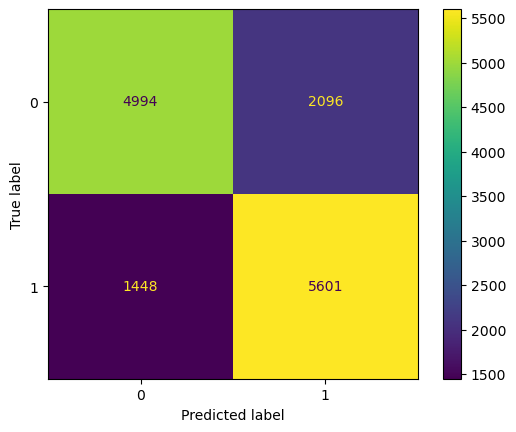

In [13]:
# Build Random Forests Classifier
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Instantiate the model - no restrictions
#Random_Forest_model = RandomForestClassifier(random_state=42)

# Instantiate the model - Restrictions applied
Random_Forest_model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=25, min_samples_leaf=50, min_samples_split=100, random_state=42)

# Train the model
Random_Forest_model.fit(X_train, y_train)

# Make predictions
y_pred_forest = Random_Forest_model.predict(X_test)

#print(y_pred[:5])
#print(y_test[:5])

#Calculate accuracy metric
accuracy_forest = accuracy_score(y_pred_forest, y_test)
print('The accuracy is: %.2f%%' % (accuracy_forest * 100))

# Get the other metrics
report = classification_report(y_test, y_pred_forest)
print(report)

cm_forest = confusion_matrix(y_test, y_pred_forest)

print(cm_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_forest)
disp.plot()


## 2.3 Analysis using Support Vector Machines

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import accuracy_score

model = SVC(kernel='linear', decision_function_shape='ovo')
#fit the model to the training data using **fit**
model.fit(X_train, y_train)

#calculate the predicted outcomes on the testing data
y_pred_svm = model.predict(X_test)

#Calculate accuracy metric
accuracy_svm = accuracy_score(y_pred_svm, y_test)
print('The accuracy is: %.2f%%' % (accuracy_svm * 100))

cm_svm = confusion_matrix(y_test, y_pred_svm)

print(cm_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()

## 3.1 Analysis Using Neural Networks

In [16]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dropout
from keras import regularizers

#print(X_train.shape)
#print(y_train.shape)

# Build the Neural Network architecture
model = keras.Sequential()
model.add(keras.Input(shape=X_train.shape[1]))  # Input layer
model.add(layers.Dense(32, activation='relu'))   # First hidden layer
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer

myoptimizer = keras.optimizers.Adam()

model.compile(optimizer=myoptimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=250, batch_size=64)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy of NN is: ", test_accuracy)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                704       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 737 (2.88 KB)
Trainable params: 737 (2.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/250
884/884 [==============================] - 1s 410us/step - loss: 0.5606 - accuracy: 0.7113
Epoch 2/250
884/884 [==============================] - 0s 400us/step - loss: 0.5239 - accuracy: 0.7406
Epoch 3/250
884/884 [==============================] - 0s 424us/step - loss: 0.5164 - accuracy: 0.7443
Epoch 4/250
884/884 [==============================] - 0s 467us/step - loss: 0.5134 - accuracy: 0.7463
Epoch 5/